#  감성분석

    - 텍스트 속에서 감성, 의견 등과 같은 주관적인 정보를 체계적으로 식별, 추출, 정량화하는 기술
    - 감성분석은 주로 리뷰 및 설문조사 응답, SNS 결과 등을 분석하는데 사용
    - 분석한 결과는 주로 파이 차트를 이용해 긍정, 부정의 비율이 몇 %인지 표시해 주는 것으로 나타냄
    
    - 절차
      데이터 준비 => 감성 사전 준비 => 데이터 가공 => 감성 분석 => 결과 시각화
      
      
    - 감성사전은 KNU 한국어 감성사전 주로 사용

In [1]:
import pandas as pd
sentdic = pd.read_csv('./dataset/review_dict.txt', sep='\t', encoding='utf-8', header=None)
sentdic.columns = ['word', 'score']

sentdic.head()

,word,score
0,감사합니다,2
1,고생했네요,-2
2,이하네요,-2
3,끝내주네요,2
4,기가막히게,1


In [7]:
with open('./dataset/ch8.txt', 'r', encoding='utf-8') as f:
    data = f.readlines()
    
    f.close()

In [8]:
data

['닭이 너무 맛있어요 최고!! 육질이 살아있음\n',
 '배송도 빠르고 상품도 좋습니다. ^^\n',
 '기가막히게 맛있습니다. 사장님 감사합니다.\n',
 '닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n',
 '완전 만족합니다. 재구매 각이네요.\n',
 '삼계탕에 넣었는데 양이 기대 이하네요...\n',
 '배송이 늦었네요. 보내주신 아이스팩이 터져서 치운다고 고생했네요. 포장에 신경써야 할듯...\n',
 '닭이 엄청 크고 실하네요. 들어갈만한 냄비가 없어서 큰 냄비를 샀네요. 맛도 좋습니다.\n',
 '아이스박스가 터져서 왔네요. 비닐도 벗겨지고... 다시 구매하고 싶지 않네요. 그나마 닭이 상하지 않은게 다행인듯...\n',
 '닭에 기름이 너무 많네요. 기름제거가 너무 힘들었네요. ㅠㅠ\n',
 '살이 너무 퍽퍽해요. 요리를 잘 못한 건지 닭 자체가 그런건지 잘 모르겠네요.\n',
 '너무 신선합니다. 살도 너무 부드러워요. 오랜만에 가족들과 맛있는 삼계탕 해먹었네요. 감사합니다.\n',
 '가격이 저렴함에도 불구하고, 닭이 너무 신선하고 맛있네요. 담에 또 구매할 생각입니다.\n',
 '싼 게 비지떡이라더니 그 말이 딱 맞네요. 저한텐 닭이 너무 작네요. 실망입니다.\n',
 '착한 가격에 뽑기가 잘된 건지 저는 너무 맛있게 잘 먹었습니다. 만족합니다. ^0^\n',
 '씻은 뒤에 에어프라이에 소금만 쳐서 돌려 먹었는데 남편도, 아이도 너무 잘 먹었습니다. 양이 좀 작은 건 아쉬웠네요.\n',
 '만족해요 만족해요 만족해요 만족해요 ^-^\n',
 '생닭인데 피가 제대로 안씻긴 듯 합니다. 씻는데 피가 자꾸 나와서 무서웠네요.\n',
 '배송하면서 아이스박스가 터진건지 보낼 때부터 이랬던 건지... 닭도 상해서 왔네요. 환불 요청합니다.\n',
 '두 마리를 시켰는데 한 마리는 큰 데 나머지 한 마리는 눈에 띄게 작네요. 가격이 싸서 그렇겠죠?\n',
 '좋아요~ 저렴한 가격에 잘 산 것 같네요. :)\n',
 '어머니가 담에는 좀

In [9]:
## 문장 벡터화를 위한 함수 불러오기
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()

## 문장을 벡터화 (띄어쓰기 기준으로 단어 분할)
bow = vector.fit_transform(data)

term = vector.get_feature_names()


import pandas as pd
# Document Term Matrix 타입으로 DF 생성
dtm = pd.DataFrame.sparse.from_spmatrix(data=bow, columns = term)

# 형태 확인
dtm.shape

/Users/hangdori/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(30, 191)

In [12]:
dtm.head()

,ㅠㅠ,ㅡㅡ,가격에,가격이,가족들과,각이네요,감사합니다,같긴한데,같네요,같습니다,...,포장에,피가,하시네요,할듯,합니다,해먹었네요,해먹었습니다,환불,훨씬,힘들었네요
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
sentdic

,word,score
0,감사합니다,2
1,고생했네요,-2
2,이하네요,-2
3,끝내주네요,2
4,기가막히게,1
5,늦었네요,-2
6,만족합니다,2
7,만족해요,2
8,맛은있네요,1
9,맛있게,2


In [28]:
ds = []

for i in range(dtm.shape[0]):
    d = []
    for j in range(dtm.shape[1]):
        if dtm.iloc[i, j] >=1:
            if sentdic.loc[sentdic.word == dtm.columns[j], 'score'].empty != True:
                d.append(sentdic.loc[sentdic.word == dtm.columns[j], 'score'].values[0] * dtm.iloc[i,j])
            else:
                d.append(0)
        else:
            d.append(0)
    s = sum(d)
    ds.append(s)
                

In [18]:
ds

[4,
 3,
 5,
 -4,
 4,
 -2,
 -6,
 5,
 -1,
 -3,
 -1,
 7,
 4,
 -3,
 4,
 -3,
 8,
 -1,
 -4,
 -1,
 2,
 -2,
 2,
 4,
 0,
 3,
 0,
 2,
 -1,
 0]

In [49]:
res = pd.DataFrame(list(zip(data, ds)), columns=['doc', 'score'])

pn = []

for row in res['score']:
    if row >= 0:
        pn.append('positive')
    elif row == 0:
        pn.append('neutral')
    else:
        pn.append('negative')
    
res['pn'] = pn

res.head()

,doc,score,pn
0,닭이 너무 맛있어요 최고!! 육질이 살아있음\n,4,positive
1,배송도 빠르고 상품도 좋습니다. ^^\n,3,positive
2,기가막히게 맛있습니다. 사장님 감사합니다.\n,5,positive
3,닭이 너무 작아요! 양이 작은 편인데도 부족하네요. ><\n,-4,negative
4,완전 만족합니다. 재구매 각이네요.\n,4,positive


In [52]:
res_g = res.groupby([pn]).count()

res_g

,doc,score,pn
negative,13,13,13
positive,17,17,17


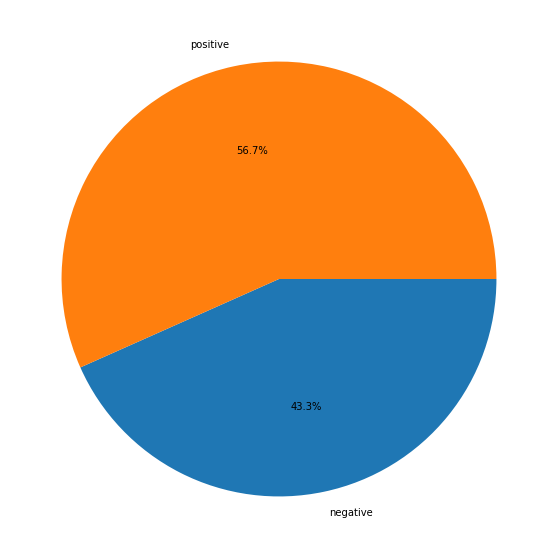

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

pct = res_g['pn']/res_g['pn'].sum()

plt.figure(figsize=(10, 10))
plt.pie(pct, labels=res_g.index, autopct='%.1f%%', startangle=0,
       counterclock = False)
plt.show()